In [1]:
import matplotlib.pyplot as plt
from skimage import io, color


In [2]:
!pip install sewar

  Preparing metadata (setup.py) ... - done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11420 sha256=dc37aadeeb4c120379ac64677df67850d23e8fab887c48871d147cd2c388e303
  Stored in directory: /root/.cache/pip/wheels/3f/af/02/9c6556ba287b62a945d737def09b8b8c35c9e1d82b9dfae84c
Successfully built sewar


In [3]:
img_path = "/kaggle/input/ds-dataset/datasets/Sand/dusttornado-001.jpg"

img = io.imread(img_path)
img = img/255
img_flat = img.flatten()

# load images from every class [each images represents the class]
img_path1 = "/kaggle/input/ds-dataset/datasets/Sand/dusttornado-001.jpg"
img_path2 = "/kaggle/input/ds-dataset/datasets/Cloudy/cloudy100.jpg"
img_path3 = "/kaggle/input/ds-dataset/datasets/Fog/foggy-002.jpg"
img_path4 = "/kaggle/input/ds-dataset/datasets/Rainy/rain100.jpg"
img_path5 = "/kaggle/input/ds-dataset/datasets/Shine/shine102.jpg"
img_path6 = "/kaggle/input/ds-dataset/datasets/Snow/snow_storm-004.jpg"
img_path7 = "/kaggle/input/ds-dataset/datasets/Sunrise/sunrise101.jpg"

# flatten the images for further use
img1 = io.imread(img_path1)
img1 = img1/255
img_flat1 = img1.flatten()

img2 = io.imread(img_path2)
img2 = img2/255
img_flat2 = img2.flatten()

img3 = io.imread(img_path3)
img3 = img3/255
img_flat3 = img3.flatten()

img4 = io.imread(img_path4)
img4 = img4/255
img_flat4 = img4.flatten()

img5 = io.imread(img_path5)
img5 = img5/255
img_flat5 = img5.flatten()

img6 = io.imread(img_path6)
img6 = img6/255
img_flat6 = img6.flatten()

img7 = io.imread(img_path7)
img7 = img7/255
img_flat7 = img7.flatten()

In [4]:
(img1.shape)

(562, 900, 3)

Last time we considered PCA as not useful because we did not
construct the inverse transformation of it.

Normally images have a lot of pixels to retain their clarity, but that significantly increases its size and slows down the performance of the system when it has to process multiple images. To overcome this situation we can use the dimensionality reduction technique which comes under Unsupervised Machine Learning.

We can also perform the same thing without splitting into blue, green, and red channels and reshaping the data into (m, n X 3) pixels, but we have found that the explained variance ratio given by the same number of PCA component is better if we use the splitting method

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

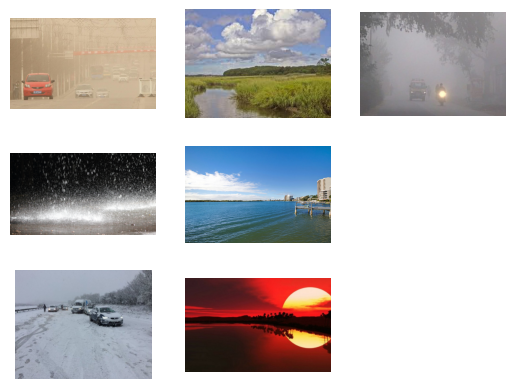

In [6]:
plt.subplot(331)
plt.axis("off")
plt.imshow(img1)

plt.subplot(332)
plt.axis("off")
plt.imshow(img2)

plt.subplot(333)
plt.axis("off")
plt.imshow(img3)

plt.subplot(334)
plt.axis("off")
plt.imshow(img4)

plt.subplot(335)
plt.axis("off")
plt.imshow(img5)

plt.subplot(337)
plt.axis("off")
plt.imshow(img6)

plt.subplot(338)
plt.axis("off")
plt.imshow(img7)

plt.show()

In [7]:
print(img1.shape, img2.shape, img3.shape, img4.shape, img5.shape, img6.shape, img7.shape)

(562, 900, 3) (194, 259, 3) (909, 1280, 3) (1158, 2059, 3) (456, 688, 3) (1019, 1280, 3) (400, 620, 3)


In [8]:
for i in range(6):
    variableName = f"x{i}"
    globals()[variableName] = i*10

print(x2)

20


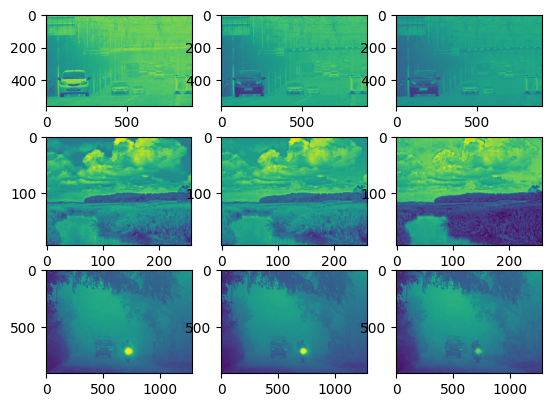

In [9]:
blue, green, red = cv2.split(img)
blue1, green1, red1 = cv2.split(img1)
blue2, green2, red2 = cv2.split(img2)
blue3, green3, red3 = cv2.split(img3)
blue4, green4, red4 = cv2.split(img4)
blue5, green5, red5 = cv2.split(img5)
blue6, green6, red6 = cv2.split(img6)
blue7, green7, red7 = cv2.split(img7)

plt.subplot(331)
plt.imshow(blue1)
plt.subplot(332)
plt.imshow(green1)
plt.subplot(333)
plt.imshow(red1)

plt.subplot(334)
plt.imshow(blue2)
plt.subplot(335)
plt.imshow(green2)
plt.subplot(336)
plt.imshow(red2)

plt.subplot(337)
plt.imshow(blue3)
plt.subplot(338)
plt.imshow(green3)
plt.subplot(339)
plt.imshow(red3)

plt.show()

In [10]:
df_blue = blue
df_green = green
df_red = red

In [11]:
pca_b = PCA(n_components=100)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=100)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=100)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [12]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(562, 100)
(562, 100)
(562, 100)


In [13]:
print("For n = 100")
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

# print("For n = 10")
# print(f"Blue Channel : {sum(pca_b_25.explained_variance_ratio_)}")
# print(f"Green Channel: {sum(pca_g_25.explained_variance_ratio_)}")
# print(f"Red Channel  : {sum(pca_r_25.explained_variance_ratio_)}")

For n = 100
Blue Channel : 0.9440904577410449
Green Channel: 0.9521560912703623
Red Channel  : 0.9469998995495431


In [14]:
# this will create 7 split channels
for i in range(1,8):
    globals()[f"df_blue{i}"] = globals()[f"blue{i}"]
    globals()[f"df_green{i}"] = globals()[f"green{i}"]
    globals()[f"df_red{i}"] = globals()[f"red{i}"]

In [15]:
for i in range(1,8):
    globals()[f"pca_b{i}"] = PCA(n_components=100)
    globals()[f"pca_b{i}"].fit(globals()[f"df_blue{i}"])
    globals()[f"trans_pca_b{i}"] = globals()[f"pca_b{i}"].transform(globals()[f"df_blue{i}"])
    
    globals()[f"pca_g{i}"] = PCA(n_components=100)
    globals()[f"pca_g{i}"].fit(globals()[f"df_green{i}"])
    globals()[f"trans_pca_g{i}"] = globals()[f"pca_g{i}"].transform(globals()[f"df_green{i}"])
    
    globals()[f"pca_r{i}"] = PCA(n_components=100)
    globals()[f"pca_r{i}"].fit(globals()[f"df_red{i}"])
    globals()[f"trans_pca_r{i}"] = globals()[f"pca_r{i}"].transform(globals()[f"df_red{i}"])

In [16]:
for i in range(1,8):
    print(globals()[f"trans_pca_b{i}"].shape)
    print(globals()[f"trans_pca_g{i}"].shape)
    print(globals()[f"trans_pca_r{i}"].shape)
    print()

(562, 100)
(562, 100)
(562, 100)

(194, 100)
(194, 100)
(194, 100)

(909, 100)
(909, 100)
(909, 100)

(1158, 100)
(1158, 100)
(1158, 100)

(456, 100)
(456, 100)
(456, 100)

(1019, 100)
(1019, 100)
(1019, 100)

(400, 100)
(400, 100)
(400, 100)



In [17]:
print("For n = 100\n")

for i in range(1,8):
    print("Blue Channel : {}".format(sum(globals() [f"pca_b{i}"] .explained_variance_ratio_)))
    print("Green Channel: {}".format(sum(globals()[f"pca_g{i}"].explained_variance_ratio_)))
    print("Red Channel  : {}".format(sum(globals()[f"pca_r{i}"].explained_variance_ratio_)))
    print()

For n = 100

Blue Channel : 0.9441382831776356
Green Channel: 0.9521295320365127
Red Channel  : 0.9470490574206514

Blue Channel : 0.9973176229115861
Green Channel: 0.9975265204851435
Red Channel  : 0.9991790827310979

Blue Channel : 0.997739030698042
Green Channel: 0.9977747357309108
Red Channel  : 0.9977578770213368

Blue Channel : 0.960251747541974
Green Channel: 0.9577662559938852
Red Channel  : 0.9581450416156485

Blue Channel : 0.9897523749635901
Green Channel: 0.9838401288890055
Red Channel  : 0.9879097826361213

Blue Channel : 0.9828153473522183
Green Channel: 0.9837018203683682
Red Channel  : 0.9854560057262031

Blue Channel : 0.9998554292485022
Green Channel: 0.999749701668814
Red Channel  : 0.9994129102713782



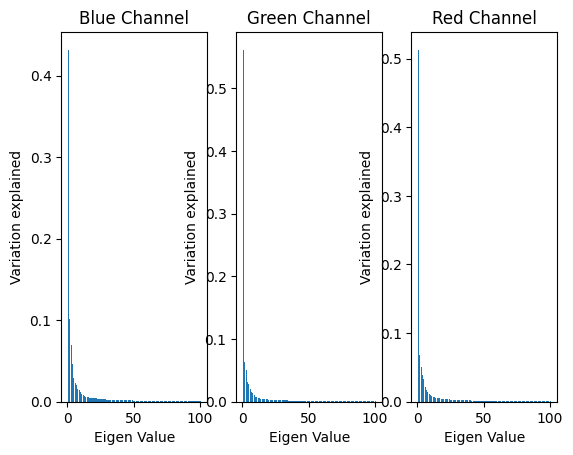

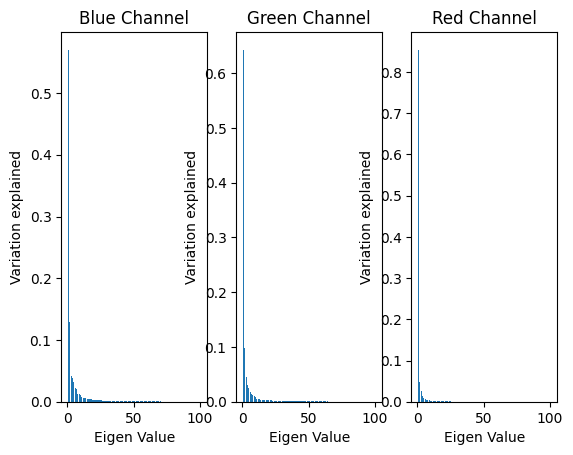

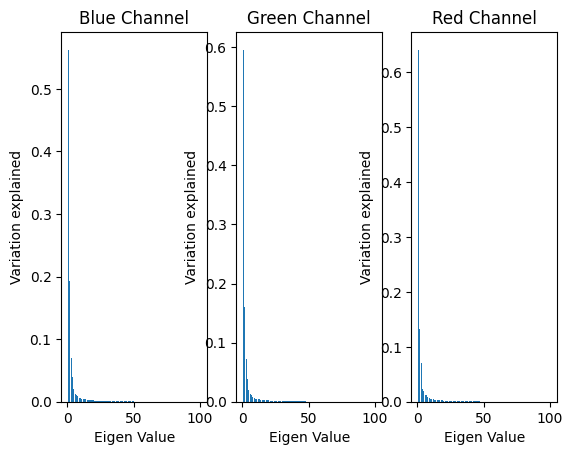

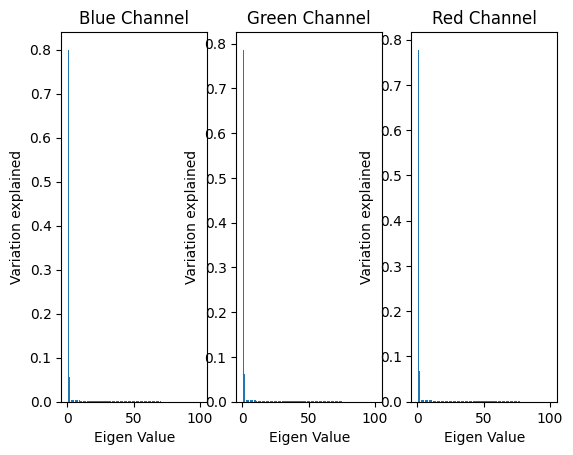

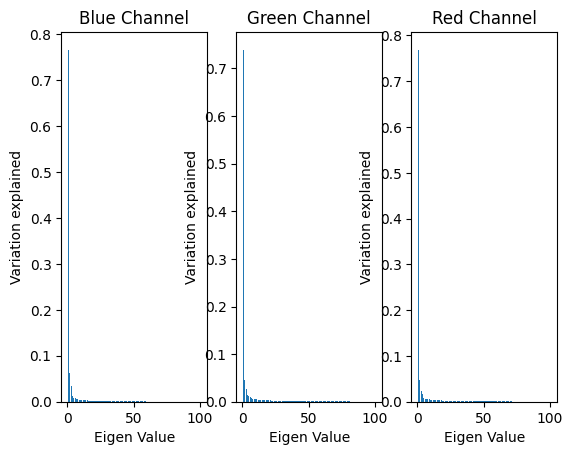

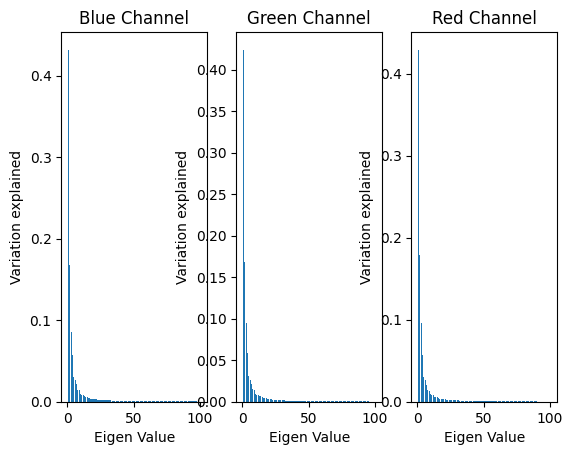

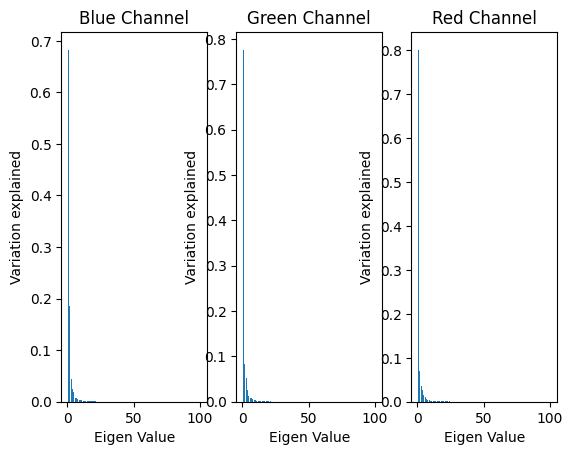

In [18]:
# fig.add_subplot to add all the subplots to form a new plot
for i in range(1,8):
    plt.subplot(131)
    plt.title("Blue Channel")
    plt.ylabel('Variation explained')
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,101)),globals()[f"pca_b{i}"].explained_variance_ratio_)
    plt.subplot(132)
    plt.title("Green Channel")
    plt.ylabel('Variation explained')
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,101)),globals()[f"pca_g{i}"].explained_variance_ratio_)
    plt.subplot(133)
    plt.title("Red Channel")
    plt.ylabel('Variation explained')
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,101)),globals()[f"pca_r{i}"].explained_variance_ratio_)
    plt.show()

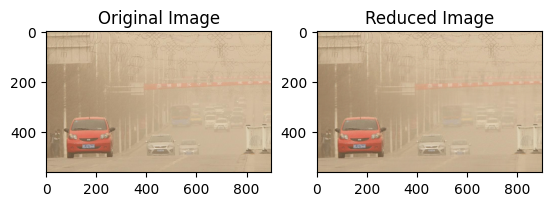

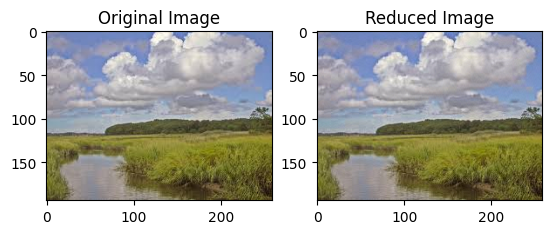

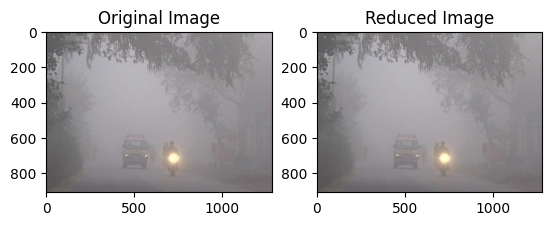

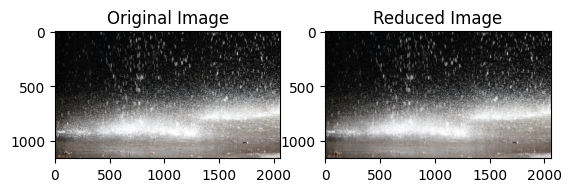

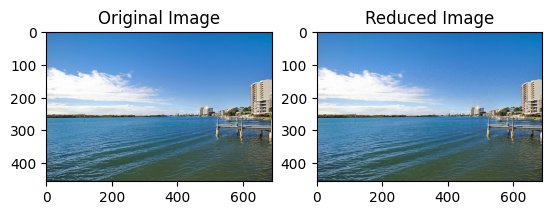

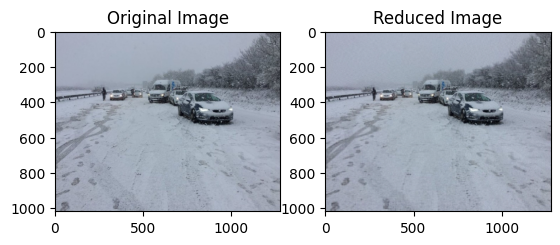

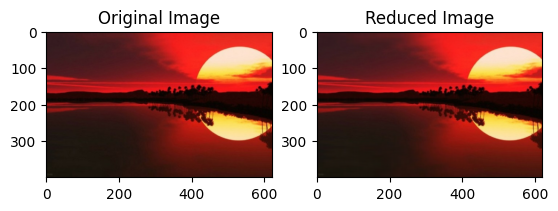

In [19]:
for i in range(1,8):
    globals()[f"b_arr{i}"] = globals()[f"pca_b{i}"].inverse_transform(globals()[f"trans_pca_b{i}"])
    globals()[f"g_arr{i}"] = globals()[f"pca_g{i}"].inverse_transform(globals()[f"trans_pca_g{i}"])
    globals()[f"r_arr{i}"] = globals()[f"pca_r{i}"].inverse_transform(globals()[f"trans_pca_r{i}"])
#     print(globals()[f"b_arr{i}"], globals()[f"g_arr{i}"], globals()[f"r_arr{i}"])

    globals()[f"img_reduced{i}"] = (cv2.merge((globals()[f"b_arr{i}"], globals()[f"g_arr{i}"], globals()[f"r_arr{i}"])))
    plt.subplot(121)
    plt.title("Original Image")
    plt.imshow(globals()[f"img{i}"])
    plt.subplot(122)
    plt.title("Reduced Image")
    plt.imshow(globals()[f"img_reduced{i}"])
    plt.show()

In [20]:
from sewar.full_ref import vifp, uqi

In [21]:
print("To measure the level of reconstruction we use (Visual Information Fidelity)VIF:")
for i in range(1,8):
    globals()[f"img{i}"] = (globals()[f"img{i}"]*255).astype(np.uint8)
    globals()[f"img_reduced{i}"] = (globals()[f"img_reduced{i}"]*255).astype(np.uint8)
    
    print("UQI : {}".format(uqi(globals()[f"img{i}"], globals()[f"img_reduced{i}"])))
    print("VIF : {}".format(vifp(globals()[f"img{i}"], globals()[f"img_reduced{i}"])))

To measure the level of reconstruction we use (Visual Information Fidelity)VIF:
UQI : 0.9997076121120355
VIF : 0.45974248958627006
UQI : 0.9959671992904257
VIF : 0.8005289125150471
UQI : 0.9999464966339291
VIF : 0.790630651840191
UQI : 0.7825520068344192
VIF : 0.14065128689931009
UQI : 0.9920999161508748
VIF : 0.37362327254011757
UQI : 0.9990101171156832
VIF : 0.4484468263183765
UQI : 0.9755341398473751
VIF : 0.7289631386796952


### VIF For each class
    sand    : 0.45 | poor reconstruction
    cloud   : 0.80 | good reconstruction
    fog     : 0.79 | good reconstruction
    rain    : 0.14 | poor reconstruction
    shine   : 0.37 | poor reconstruction
    snow    : 0.45 | poor reconstruction
    sunrise : 0.72 | good reconstruction

With only keeping 50 dimensions we can retain almost 90% of the image data, great improvement for computation

plot bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels:

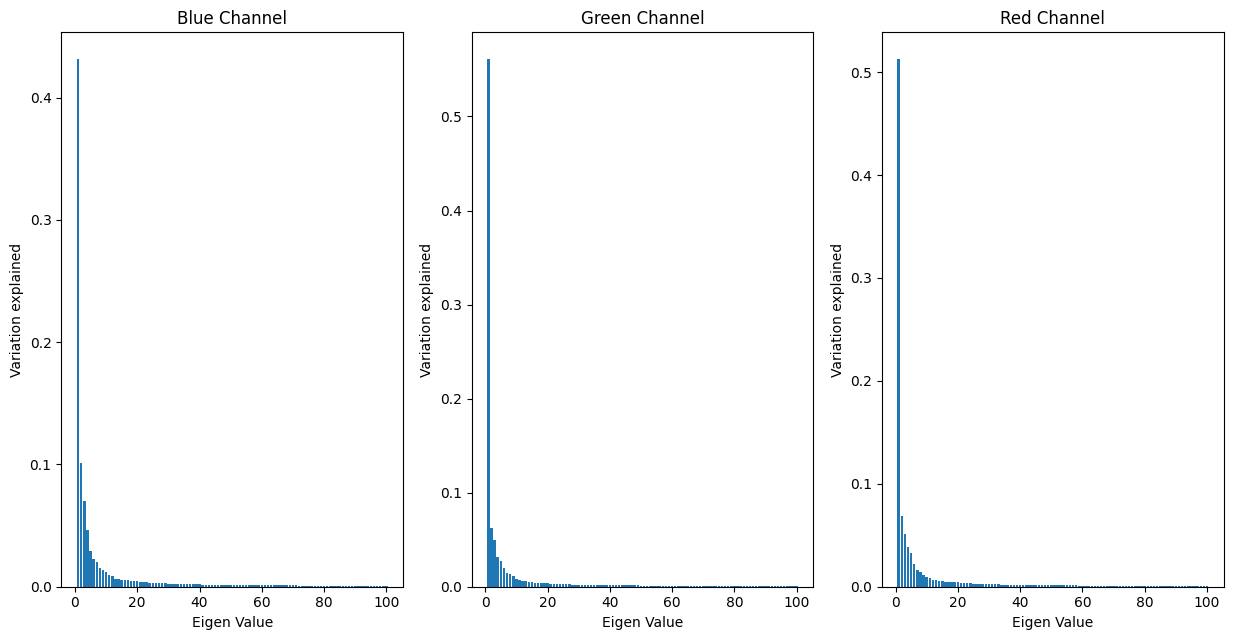

In [22]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_r.explained_variance_ratio_)
plt.show()

<h3>Reconstruct the image and visualize</h3>
We have completed our PCA dimensionality reduction. Now we will visualize the image again and for that, we have to reverse transform the data first and then merge the data of all the 3 channels into one

In [23]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

# b_arr_25 = pca_b_25.inverse_transform(trans_pca_b_25)
# g_arr_25 = pca_g_25.inverse_transform(trans_pca_g_25)
# r_arr_25 = pca_r_25.inverse_transform(trans_pca_r_25)
# print(b_arr_25.shape, g_arr_25.shape, r_arr_25.shape)

(562, 900) (562, 900) (562, 900)


In [24]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

# img_reduced_25= (cv2.merge((b_arr_25, g_arr_25, r_arr_25)))
# print(img_reduced_25.shape)

(562, 900, 3)


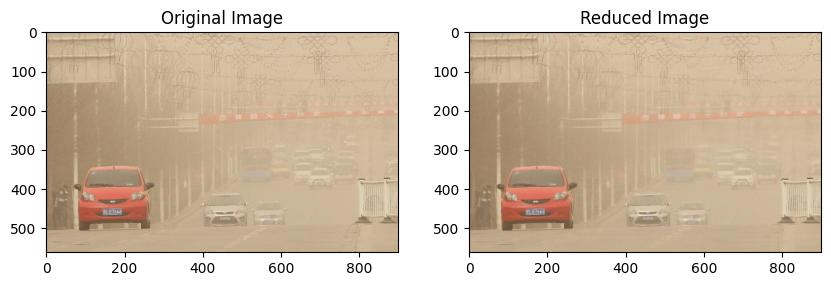

In [25]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

# fig = plt.figure(figsize = (10, 7.2)) 
# fig.add_subplot(121)
# plt.title("Original Image")
# plt.imshow(img)
# fig.add_subplot(122)
# plt.title("Reduced Image")
# plt.imshow(img_reduced_25)
# plt.show()

Similar to PCA we can use SVD

### Image convolution
Filtering , Convolution, Matrix, Color values, kernel


Convolution is a general purpose filter effect for images

It works by determining the value of a central pixel by adding the
weighted values of all its neighbors together

The output is a new modified filtered image

convolution is simply an element-wise multiplication of two matrices followed by a sum.

In [26]:
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
# import argparse

Custom function if needed

```python
def convolve(image, kernel):
    # pading can be added or not based on requirement
    # get dim of image and kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = image.shape[:2]
    
    # do pading for applying convolution
    # allocate memory for the output image, taking care of "pad"
    pad = (kW -1)//2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
                              cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    
    for y in np.arange(pad, iH+pad):
        for x in np.arange(pad, iW+pad):
            # extract region of interest
            roi = image[y - pad : y + pad + 1, x - pad : x + pad + 1]
            k = (roi * kernel).sum()
            output[y-pad, x-pad] = k
    
    output = rescale_intensity(output, in_range=(0,255))
    output = (output * 255).astype("uint8")
    return output
```

In [27]:
smallBlur = np.ones((5,5), dtype="float") * (1.0 / (5 * 5))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# kernel for sharpening img
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")


Applying small_blur kernel.


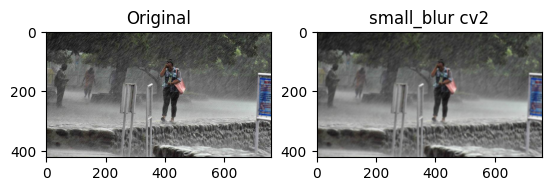

Applying large_blur kernel.


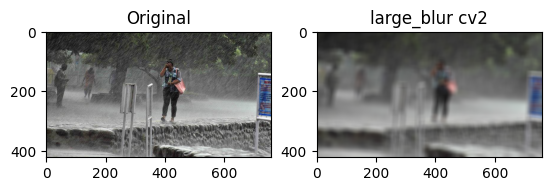

Applying sharpen kernel.


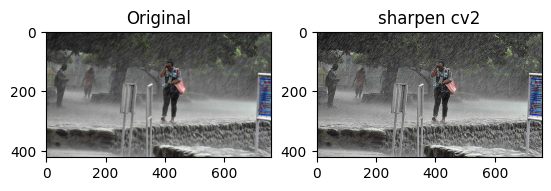

Applying laplacian kernel.


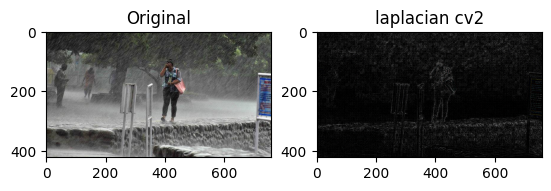

Applying sobel_x kernel.


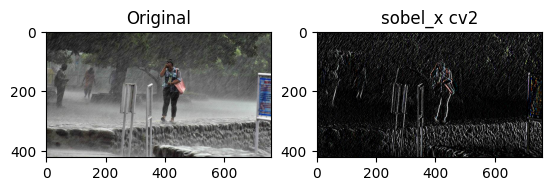

Applying sobel_y kernel.


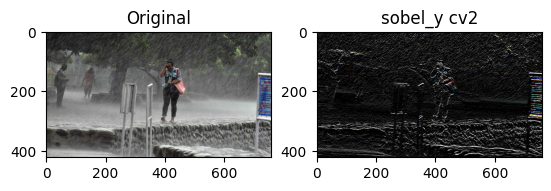

In [28]:
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)
img_path = "/kaggle/input/ds-dataset/datasets/Rainy/rain11.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for (kernelName, kernel) in kernelBank:
    print(f"Applying {kernelName} kernel.")
    cv2Output = cv2.filter2D(img, -1, kernel)
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title(f"{kernelName} cv2")
    plt.imshow(cv2Output)
    plt.show()
    

Feature Extraction using ResNet


In [29]:
import torch
import torch.nn as nn
from torchvision import models, transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

resnet = models.resnet50(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]


In [30]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [31]:
from PIL import Image

In [32]:
def extract_features(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0) 

    with torch.no_grad():
        features = resnet.conv1(img_tensor)
        features = resnet.bn1(features)
        features = resnet.relu(features)
        features = resnet.maxpool(features)

        features = resnet.layer1(features)
        features = resnet.layer2(features)
        features = resnet.layer3(features)
        features = resnet.layer4(features)

    return features.squeeze()[:,:,0] # remove the batch dimension

# Extract features from the image
features = extract_features(img_path)
print(features.shape)

torch.Size([2048, 7])


In [33]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

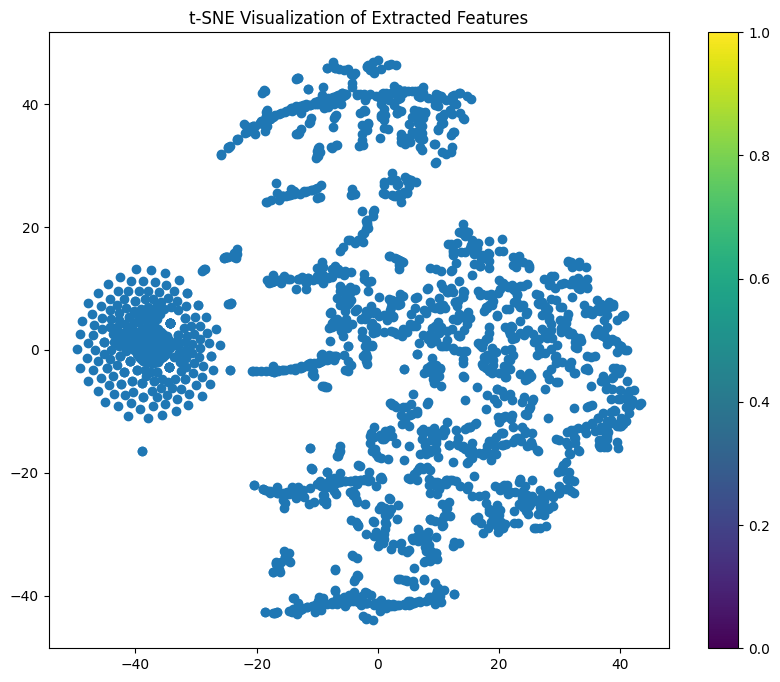

In [34]:
# Stack the features into a single array
features_array = np.stack(features, axis=0)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# Visualize the t-SNE reduced features
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1])
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Extracted Features')
plt.show()